# Notebook for INF588 - 2024

## First class - Python warm up and the Vienna RNA package

In the class INF588, you are going to work on two different Bioinformatics projects:   
- Computing alignments of proteins using structural information  
- Predicting the structure of RNAs from an RNA alignment

Both projects require you to write Python code to implement the required algorithms and tools and then apply them to biological data.

Thus, before jumping into these projects it makes sense to

1. re-activate or strengthen your Python skills by solving some warm-up assignments, which mostly prepare code required in the projects;
1. learn about simple use of Biopython to read/write bio-data. *Note*: find details online on-the-go, e.g. when you want to read sequences from fasta format and alignments in clustal or stockholm format;
1. learn how to use the Vienna RNA package, which we need for the RNA-related project.



## About this document

This Jupyter notebook serves several purposes:

* It contains warm-up Python programming tasks for the first class.

* It introduces the Vienna RNA package for use in the RNA folding project.

* It shows how to install required software including Python, Biopython and the Vienna RNA package, locally or in Google Colab.

* It provides examples for the use of the Vienna package from Python - providing a mini-tutorial tailored to our needs.

* Finally, it provides a pointer to test data (and shows how to upload it on Colab, if you have to).

For today, it is possible to work in this notebook on Colab, i.e. write and run your code in the browser. You could continue using Colab for the rest of this class, but it is likely more convenient to continue without Colab after install Python and the required packages locally.


## Installation of Biopython and the Vienna RNA package

We install the special Python modules Biopython and the Vienna RNA package using pip. On Google Colab, this requires no further preparation, but the
installation has to be repeated once per session. If you work locally (as recommended), then the installation needs to be done only once. However, you need to install Python 3.x, pip, and VS Code or Jupyter(*) in advance. 

(*) We recommend VS Code to edit and run this Jupyter notebook (.ipynb file); or use Jupyter to do the same in your browser. 

Our two special Python modules can be installed by pip by running the next cell. In the same way, we can install additional packages as required, e.g. matplotlib and seaborn. Many standard packages are typically alread installed in Google Colab.

In [1]:
pip install viennarna biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
import RNA

## Python warm-up assignments



### Assignment 1: Sequence identity of an alignment

An RNA sequence is a string containing only the characters A, C, G, and U, which denote the four nucleotides Adenin, Cytosin, Guanin, and Uracil.

An alignment of two RNA sequences x and y is typically represented by a pair of alignment strings x' and y' that additionally contain gap symbols $-$.

The pair $x', y'$ represents an alignment of RNA sequences $x$ and $y$ iff
1. removing gap symbols in $x'$ [$y'$] yields the sequences $x$ [$y$], resp.
2. there is no $i$ such that $x_i=-$ and $y_i=-$.

For example,
```
x' = ACGU--CGACUAGC-
y' = -CGUCGU-ACUCGCG
```
represents an alignment of ```ACGUCGACUAGC``` and ```CGUCGUACUCGCG```.
A column $(x'_i,y'_i)$ is called a match if $x'_i=y'_i$.

1. Write a function that takes the two alignment strings and returns the percentage of match colunmns, i.e. the sequence identity of the alignment.

1. In publicly available RNA sequence data, one will often find small letter symbols and even T instead of U. Extend the function such that it can converts small letters to capital ones and T to U. Write another function to perform this transformation and make the transformation optional in the sequence identity function, e.g. by adding another argument with default ```True```.

1. Write a function that returns a list of the *edges* in an alignment. An edge is a pair of respective positions $i$ and $j$ in $x$ and $y$ that are in the same alignment column (regardless whether matched or mismatched). The alignment should be givn as a pair of alignment strings. Indexing sequence positions from 1 to the sequence length [*1-based indexing*], edges of our example alignment are (2,1), (3,2), (4,3), (5,6), ..., (12,12). For example, (5,6) is an *edge* of the alignment given by $x',y'$, because the `C` at position 5 of sequence $x$ is in the same column as the `G` at position 6 of $y$.

1. Add meaningful doc strings to your functions. Generally, one should get into the habit of writing at least a brief description for every function / method / class. It is good practice, to describe arguments and return value (see function sequence_identity below). Using type hints, as in sequence_identity (even sporadically), can be a good idea as well.

1. Write unit tests for your functions; design simple examples that include edge cases like gaps at the beginning and end of sequences, consecutive insertion and deletion, empty alignment, identical alignment strings, no identity...

In [3]:
def sequence_identity(xp:str, yp:str) -> str:
    """
    Sequence identity of two aligned sequences

    Args:
      xp: alignment string of sequence x
      yp: alignment string of sequence y
    
    Returns:
      Percentage of identical alignment columns
    """
    identical_count=0
    #transform str to lists so we can modify them
    xp=list(xp.upper())
    yp=list(yp.upper())
    for i in range (len(xp)):
        if xp[i]=='T':
            xp[i]='U'
        if yp[i]=='T':
            yp[i]='U'
        if xp[i]==yp[i]:
            identical_count+=1
    #transform lists back to str
    xp= ''.join(xp)
    yp = ''.join(yp)
    #print(xp)
    return identical_count/len(xp)

In [4]:
def edges_alignement(xp:str, yp:str) -> list:
    """
    returns the list of the edges in an alignment

    Args:
      xp: alignment string of sequence x
      yp: alignment string of sequence y
    
    Returns:
      List of edges, an edge being a tuple of the indexes of the aligned bases
    """

    indexx=1
    indexy=1
    edges=[]
    for i in range(len(xp)):
        if xp[i]!="-":
            if yp[i]!="-":
                edges.append((indexx, indexy))
                indexx+=1
                indexy+=1
            else :
                indexx+=1
        else :
            if yp[i]!="-":
                indexy+=1
    return edges


In [5]:
##Test functions

xp="ACGt--CGACUAGC-"
yp="-cGuCGU-ACTCGCG"
print(sequence_identity(xp,yp))
print(xp,yp)
print(edges_alignement(xp,yp))

0.5333333333333333
ACGt--CGACUAGC- -cGuCGU-ACTCGCG
[(2, 1), (3, 2), (4, 3), (5, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12)]


### Assignment 2: RNA structure dot-bracket representation


An *RNA structure* for an RNA of sequence length $n$ is a set of *base pairs* $(i,j)$, $1 \leq i < j \leq n$. Typically, we restrict ourselves to structures that can be represented by *dot-bracket strings*. These strings contain only dots ```.``` and opening and closing brackets ```(``` and ```)```. They contain one symbol for each sequence position. The dot marks an unpaired position, while an opening bracket tells that the base is paired to the base of the corresponding closing bracket.

For example, let the sequence and structure of an RNA described by
```
sequence = "CGCUUAGCGAAUC"
dbstring = ".((...))(...)"
```
Then, the dot-bracket string ```dbstring``` describes the structure (aka the set of base pairs) ```{(2,8),(3,7),(9,13)}```.

A structure is *canonical* for a sequence $x$, if for all base pairs $(i,j)$ of the structure $(x_i,x_j)$ is one of the *canonical base pairs* (A,U),(C,G),(G,C),(G,U),(U,A), or (U,G).

1. Write a function that takes a sequence length and a set or list of base pairs and returns the corresponding dot-bracket string.

1. Write a function ```parse_RNA_structure``` that takes a dot-bracket string and returns the corresponding base pair set as a list. How should it handle invalid dot-bracket strings? Use exceptions (https://docs.python.org/3/tutorial/errors.html).

1. Write a function ```is_canonical``` that checks whether a structure, given as dot-bracket string, is canonical for a sequence. (Write helper functions like ```is_canonical_basepair(x,y)```, where reasonable.)

1. Based on your previous code, implement a Python class ```RnaMolecule``` that represents an RNA sequence and a corresponding structure. Objects of this class should be initialized with a sequence and optionally a structure, printing an object should show the sequence and dot bracket string, it should be possible to get the base pair list representation of an object... (https://docs.python.org/3/tutorial/classes.html)

**Note:** pay attention that we use one-based positions to describe the base pairs, while strings in Python use zero-based indices. One and zero-based indexing is a recurring issue when working with RNAs and specifically the Vienna RNA package. Beware since this is a potential source of errors.

In [87]:
def dot_bracket_string(seq_length, base_pairs, decalage=-1):
    """
    returns the dot bracket string of the structure defined by the list of base pairs

    Args:
      seq_length : length of the sequence
      base_pairs : set or list of base pairs
    
    Returns:
      String that represents the dot bracket of the structure
    """
    db=["." for i in range (seq_length)]
    for pair in base_pairs:
        ind0, ind1=pair
        db[ind0+decalage]="("
        db[ind1+decalage]=")"
    db=''.join(db)
    return db


In [92]:
base_pairs={(2,8),(3,7),(9,13)}
print (dot_bracket_string(13, base_pairs))

.((...))(...)


In [59]:
def parse_RNA_structure(dbstring):
    base_pairs=[]
    list_db=list(dbstring)
    n=len(list_db)
    for i in range(len(list_db)):
        if dbstring[i] == "(":
            #find associated closing parenthesis
            index=0
            j=i+1
            found=False
            while j<n and not found:
                if list_db[j]=="(":
                    index+=1
                elif list_db[j] == ")":
                    if index==0:
                        found=True
                        base_pairs.append((i,j))  
                    else :
                        index-=1
                j+=1
            if not found :
                raise NameError('Invalid dbstring')
    return base_pairs

In [60]:
parse_RNA_structure(".((...))(...)")

[(1, 7), (2, 6), (8, 12)]

### Assignment 3: Map an RNA structure to a sequence based on an alignment string

Another sub-problem that you will likely encounter in the RNA-project is the following: given an alignment string $x'$ and a dot bracket string $y'$ of the length of the alignment, obtain $x$ and the corresponding dot-bracket string $y$ that describes the 'projected' structure for $x$.

This situation occurs when $y'$ describes a consensus structure of the sequences in an alignment. 

As an example, consider the following alignment
with a dot-bracket string that describes the consensus base pairs.

```
GCCGCUUA-CAGGAAUCCUGC
CGCGCUUAGCAGGAAUCCUCG
GCC-CUUAG-U-GAAUCCAGC
((.((...))(((...)))))
```

For the third alignment row and the dot bracket structure, we want to obtain the following sequence and projected structure
```
GCCCUUAGUGAAUCCAGC  GCCCUUAGUGAAUCCAGC
((.(...)((...).)))  ((.(...)((...).)))
```
Compared to the consensus structure, the projected structure does not contain any base pair that involved gaps in the alignment string.

1. Write a function that performs the 'projection'. It should return the sequence and projected structure. Make use of previously implemented functions from the previous assignments, where appropriate.

1. Test [and document] your function.

1. Can you reasonably use [or even extend?] the class ```RnaMolecule``` from the previous assignment?

In [47]:
def get_rid_brackets_op(list_of_car, index_opening):
    """deletes in the list_of_car the opening bracket at index index_opening and replace associated closing bracket by "."
    returns the new list and the indix of the closing bracket
    """
    list_of_car.pop(index_opening)#erases opening bracket
    index=0
    for i in range(index_opening,len(list_of_car)):
        if list_of_car[i]=="(":
            index+=1
        elif list_of_car[i] == ")":
            if index==0:
                list_of_car[i]="."
                return list_of_car
            else :
                index-=1
    raise NameError('No associated closing bracket. Invalid dbstring')

def get_rid_brackets_cl(list_of_car, index_closing):
    """deletes in the list_of_car the closing bracket at index index_closing and replace associated opening bracket by "."
    returns the new list and the indix of the opening bracket
    """
    list_of_car.pop(index_closing)#erases opening bracket
    index=0
    for i in range(index_closing,-1,-1): #go back in the list to find the opening bracket
        if list_of_car[i]==")":
            index+=1
        elif list_of_car[i] == "(":
            if index==0:
                list_of_car[i]="."
                return list_of_car
            else :
                index-=1
    raise NameError('No associated opening bracket. Invalid dbstring')

In [48]:

def projection(alignmentstr,dbstring):
    """
    returns the projected sequence and the projected dot bracket string of the alignement alignmentstr

    Args:
      alignmentstr : string representing the aligned sequence
      dbstring : dbstring of the consensus sequence
    
    Returns:
      proj_seq : string of the projected sequence
      proj_db: Sstring of the projected dot bracket string
    """
    proj_seq=[]
    proj_db=list(dbstring)
    indexdbstring=0 #we need to index how we move in the dbstring because removing prenthesis will change the index
    for i in range (len(alignmentstr)):
        if alignmentstr[i]=="-":
            if proj_db[indexdbstring]=="(":
                proj_db=get_rid_brackets_op(proj_db,indexdbstring)
            elif proj_db[indexdbstring]==")":
                proj_db=get_rid_brackets_cl(proj_db,indexdbstring)
            else :
                proj_db.pop(indexdbstring)
        else :
            proj_seq.append(alignmentstr[i])
            indexdbstring+=1
    return ''.join(proj_seq), ''.join(proj_db)


In [49]:
list_of_car=["(","(",".",")",")","."]
get_rid_brackets_cl(list_of_car, 4)
print(list_of_car)

alg_str="GCC-CUUAG-U-GAAUCCAGC"
dbs="((.((...))(((...)))))"
print(projection(alg_str,dbs))

['.', '(', '.', ')', '.']
('GCCCUUAGUGAAUCCAGC', '((.(...)((...).)))')


### Assignment 4: Count paths in an $n\times m$ grid

In both projects of the class, you will be asked to implement dynamic programming algorithms. As warm-up solve the following problem. An efficient solution uses dynamic programming.

Given is a $n \times m$ grid.

For example, here is a grid of $3 \times 4$ cells:
```
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
```
We want to count the number of paths from the upper-left to the lower-right cell, where paths can only move right or down in each step.
Here, is the example grid with one possible path:
```
.     + - + - + - + - +
.     | #---# |   |   |
.     + - + | + - + - +
.     |   | #---#---# |
.     + - + - + - + | +
.     |   |   |   | # |
.     + - + - + - + - +
```

1. Write a recursive function that counts paths for $n\times m$ based on the numbers of paths for $n-1\times m$ and $n\times m-1$. Test your function for some [small] instances. Why is this function inefficient?

1. Based on the recursive function, develop an efficient function that avoids redundant computation of sub-problems due to dynamic programming.

1. Consider the problem variant, where paths can as well move diagonally down-right. How is this problem related to a typical pairwise sequence alignment algorithm (like Needleman-Wunsch)?

## The Vienna RNA package

Before working on the RNA project, you should briefly familiarize yourself with the elementary functionality of the Vienna package. You will get example code that is almost ready to use. The most essential theory is/will be also presented in class and on lecture slides.

We use the Vienna RNA package in the RNA project (mainly) to predict Minimum Free Energy structures of RNAs as well as to predict base pair probabilities; moreover, to call RNAalifold for comparison and benchmarks. These uses will be demonstrated in this document.

The home of the Vienna package is

https://www.tbi.univie.ac.at/RNA/

Among other things, you will find **documentation of the Python API** (https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/index.html).

Recall, that one can install the Vienna RNA package using pip: ```pip install viennarna```

## Usage of the Vienna RNA package in Python

One finds more details in the API documentation:

https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/index.html

#### Predicting the Minimum free energy structure

In [10]:
import RNA
# The RNA sequence
sequence = "GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA"

# create a new model details structure
md = RNA.md()

# optionally one could change all kinds of parameters
# md.temperature = 25.0 # 25 Deg Celcius
# md.dangles = 1 # keep default dangles=2 for compatibility with partition folding

# create a fold compound
fc = RNA.fold_compound(sequence, md)

# predict Minmum Free Energy and corresponding secondary structure
(ss, mfe) = fc.mfe()

# print sequence, structure and MFE
print("%s\n%s [ %6.2f ]\n" % (sequence, ss, mfe))

GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA
..(((((........)))))(((((((...)))))))..... [  -8.80 ]



For interpretation the dot bracket string in a program, the RNA lib supports conversion to a 'pair table'.
This can be used as alternative to a base pair list (as you were asked to produce before in parse_RNA_structure) or allows to more easily generate one.

In [11]:
# parse the dot-bracket structure:
# RNA.ptable returns a table, such that table[i]=j if (i.j) pair or 0 if i is unpaired.
# note: positions are 1-based; table[0] contains the length of the structure.
pt = RNA.ptable(ss)
print(pt)

{ data: [42,0,0,20,19,18,17,16,0,0,0,0,0,0,0,0,7,6,5,4,3,37,36,35,34,33,32,31,0,0,0,27,26,25,24,23,22,21,0,0,0,0,0], type: RNA.VAR_ARRAY_LINEAR | RNA.VAR_ARRAY_ONE_BASED}


The RNA library implements functionality to draw structures. Here is code to draw the predicted structure.

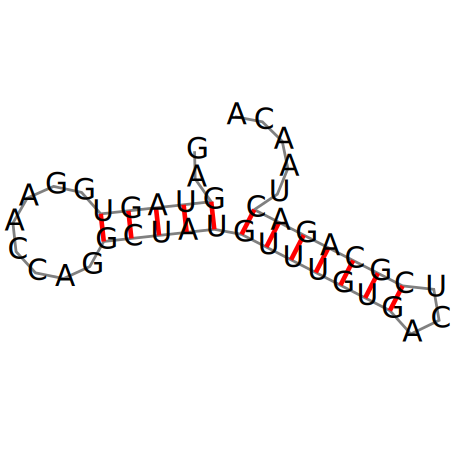

In [12]:
import tempfile
from IPython.display import SVG

fp = tempfile.NamedTemporaryFile(suffix=".svg", delete=False)
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

#### Predicting partition funtions and  base pair probabilities

In [13]:
## Code adapted from the Vienna RNA package API documentation

import RNA
sequence = "GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA"
# create model details
md = RNA.md()
# activate unique multibranch loop decomposition
md.uniq_ML = 1
# create fold compound object
fc = RNA.fold_compound(sequence, md)
# compute MFE
(ss, mfe) = fc.mfe()
# rescale Boltzmann factors according to MFE; rescaling avoids numerical problems for long sequences
fc.exp_params_rescale(mfe)
# compute partition function to fill DP matrices
fc.pf()

['..(((((........)))))(((((((...))))))).....', -9.020990371704102]

After calculating the partition function, one can get a matrix of base pair probabilities from the fold compound. Attention: this matrix is 1-based and only entries i<j are meaningful.

In [14]:
bpp = fc.bpp()
print(bpp)

((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.471517529842516e-06, 0.0, 0.0, 0.0, 0.0, 6.7914308034729204e-06, 0.0010463644992186184, 0.0, 0.0, 0.0, 7.447410311850143e-05, 2.9291356941424898e-05, 0.0, 0.0005026182125581968, 0.0, 3.417231000231424e-05, 1.8486889452001566e-05, 5.428577622559217e-06, 0.0, 2.060338991945052e-08, 0.0, 0.0, 3.329735477374925e-08, 1.2277730722081869e-08, 0.007621723242911447, 0.0, 2.7482845615862135e-05, 0.0, 0.0, 0.0, 3.630494075522003e-05, 8.068136451807428e-05, 0.0, 0.0, 0.0024215220879167942, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4132247404604086e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025220545619955785, 0.0, 0.003759500839455213, 0.0, 2.829946707802918e-05, 7.251982919229703e-06, 1.0551914003292453e-06, 0.0, 6.34186818876927

The base pair probabilities can be visualized

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


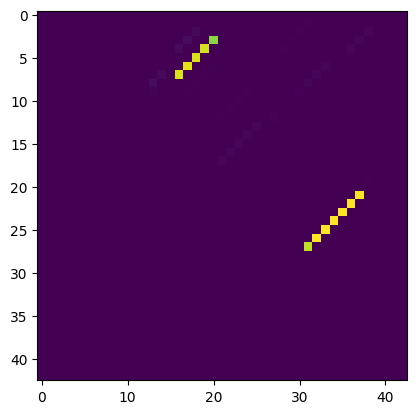

In [16]:
# produce simple 'dot plot'
import matplotlib.pyplot as plt
bpp2 = [p**2 for row in bpp[1:] for p in row[1:]]
plt.imshow(bpp)

We will also need unpaired probabilities for nucleotides i. They can be computed from the base pair probabilities. We obtain an unpaired probability profile of our RNA.

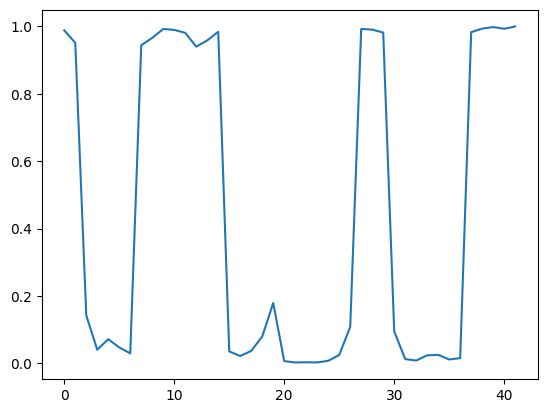

In [17]:
# compute unpaired probabilities (0-based)
# ATTENTION: bpp contains probability values only for i<j
unp = [1-sum(bpp[i][j]+bpp[j][i] for j in range(1,len(sequence)+1)) for i in range(1,len(sequence)+1)]
#print(unp)
plt.plot(unp)

#### Predicting structures from alignments

The Vienna package can predict structures from Alignments by the *Alifold* method. For this purpose, we pass an alignment (instead of a single sequence) to the fold compound. Then, we can ask it to produce an mfe structure (or partion function, ...) as in the single sequence case.

In [18]:
import RNA
# The RNA sequence

alignment = ["GGAGGAUUAGCUCAGCUGGGAGAGCAUCUGCCUUACAAGCAGAGGG-----------UCGGCGGUUCGAGCCCGUCAUCCUCC",
"GCCUUCCUAGCUCAG-UGGUAGAGCGCACGGCUUUUAACCGUGUGG-----------UCGUGGGUUCGAUCCCCACGGAAGGC",
"GCCUUUAUAGCUUAG-UGGUAAAGCGAUAAACUGAAGAUUUAUUUA-----------CAUGUAGUUCGAUUCUCAUUAAGGGC",
"GCGGAUAUAACUUAGGGGUUAAAGUUGCAGAUUGUGGCUCUGAAAA------------CACGGGUUCGAAUCCCGUUAUUCGC",
"GGAAAAUU-GAUCAUCGGCAAGAUAAGUUAUUUACUAAAUAAUAGGAUUUAAUAACCUGGUGAGUUCGAAUCUCACAUUUUCC"
]

# create a new model details structure
md = RNA.md()
# optionally one could change some parameters
# md.temperature = 25.0 # 25 Deg Celcius
# md.dangles = 1 # keep default 2 for compatibility with partition folding
# create a fold compound
fc = RNA.fold_compound(alignment, md)
# predict the  "Alifold" Minmum Free Energy and the corresponding secondary structure
(ss, mfe) = fc.mfe()
conservation_score = fc.eval_covar_structure(ss)
print("%s\n%s [ %6.2f, %6.2f ]\n" % ('\n'.join(alignment), ss, mfe, conservation_score))

GGAGGAUUAGCUCAGCUGGGAGAGCAUCUGCCUUACAAGCAGAGGG-----------UCGGCGGUUCGAGCCCGUCAUCCUCC
GCCUUCCUAGCUCAG-UGGUAGAGCGCACGGCUUUUAACCGUGUGG-----------UCGUGGGUUCGAUCCCCACGGAAGGC
GCCUUUAUAGCUUAG-UGGUAAAGCGAUAAACUGAAGAUUUAUUUA-----------CAUGUAGUUCGAUUCUCAUUAAGGGC
GCGGAUAUAACUUAGGGGUUAAAGUUGCAGAUUGUGGCUCUGAAAA------------CACGGGUUCGAAUCCCGUUAUUCGC
GGAAAAUU-GAUCAUCGGCAAGAUAAGUUAUUUACUAAAUAAUAGGAUUUAAUAACCUGGUGAGUUCGAAUCUCACAUUUUCC
(((((((..((((........))))((((((.......))))))...............(((((.......)))))))))))) [ -25.34,   7.80 ]



## Assignment 5: Use the Vienna RNA package

a) Write a function that takes an alignment (as above) and computes the mfe structures of the single sequences (without gaps).

b) Compare the single sequence mfe structures to the alifold mfe structure of the alignment (compare dot bracket strings and/or visualize as secondary structure plots).

c) Write a function that takes an alignment (as above) and computes the average positional unpaired probabilities from folding
the single sequences. Take care, where this requires to map sequence positions to alignment columns or vice versa.

d) Visually compare this profile to the Alifold mfe structure and the corresponding Alifold unpaired probability profile. 

e) Quantify the difference between the profiles (e.g. sum over the log of the positional ratios...).

## Test data

Find test data here
https://www.lix.polytechnique.fr/~will/Teaching/INF588/Testdata

Can your program handle all of the diverse examples (in different file formats)?

Here is one way to download the data to Colab by downloading an archive of all files and unpacking it. The files will be written to subdirectory Testdata

In [19]:
from urllib.request import urlretrieve
arcfile = "testdata.zip"
url = f"https://www.lix.polytechnique.fr/~will/Teaching/INF588/{arcfile}"
urlretrieve(url, arcfile)

import zipfile
with zipfile.ZipFile(arcfile, 'r') as zip_ref:
    zip_ref.extractall(".")

!ls Testdata

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


## Assignment 6

a) Write a function to read an alignment from either an aln or stk file. Use Biopython (https://biopython.org/docs/1.75/api/Bio.AlignIO.html) and find out about stk / Stockholm files!

b) Apply the functions from the previous assignment to the test alignments. How could we interpret the results?

## How to work on the project
In principle, you could start your work using Colab and simply extend this notebook. However at least in the longer run, it will have advantages to run everything 'locally' on your own computer; without Colab.  Note that for example, running larger computations in Colab can be inconvenient; also, Colab will require you to reinstall Conda, Biopython and Vienna RNA in each new Colab session.

See above for how pip can be used to install the required software. This works in Colab as well as locally. *Optionally*: For local installation, one should consider installation in a Conda environment or Python virtual environment (which helps to keep things nicely structured, if one works on several projects with different software dendencies etc). 

# RNA Alignment project

**Project key ideas.**
In this project, you are going to develop an RNA prediction approach from alignments of homologous RNAs in the spirit of RNAalifold from the Vienna RNA package [4]. Unlike RNAalifold, your approach should make original use of precomputation of base pair probabilities. This allows a simpler implementation and can speed up the computation. Moreover, it allows us to experiment more easily with variants of the algorithm and write specific extensions to perform fast analysis of RNA families for potential structural heterogeneity. The project will result in efficient novel tools for the structural analysis of RNA family alignments:

• An RNAalifold-like tool to predict the consensus structure of an RNA alignment (implementing the precomputation-based strategy).

• A tool to systematically study structural variation among sub-groups of RNAs in an alignment, which identifies main subgroups together with main structural variants. 

Moreover, in application to real RNA alignments, it aims to identify structurally heterogeneity in RNA families 

**Project details.** 
The tools and scripts should be written in Python, making use of Biopython and the
Vienna RNA package. The following steps and questions provide some guideline for the project; Further
details and background will be presented and discussed in class.

1. Develop a program, that accepts an alignment and predicts an RNA consensus structure by optimization following a ’Nussinov’-like Dynamic Programming algorithm. Step-by-step implement the
following variants:

    • Maximize a sum of common base pairs and unpaired positions based on predicted structures
for the single alignment sequences.

    • Maximize a sum of base pair and unpaired probabilities based on predicted probabilities for the
single sequences (using McCaskill’s algorithm). Technically, this maximizes expected accuracy
(MEA).

    • Maximize while adding a conservation score to the above objective functions.

Determine the optimal structure by trace-back and visualize your predictions. Implement convenient
interfaces to use the algorithm from Python and/or provide the functionality as command line tool.

In [20]:
def simple_count_cost (base1, base2):
    """ computes wether two RNA bases (a,u,c,g or t) are complementary
    IN : two car base 1 and base 2, upper case
    Returns : int, 1 if complementary, 0 otherwise
    """
    if base1=="A":
        if base2=="T" or base2=="U":
            return 1
        else :
            return 0
    if base1=="T":
        if base2=="A":
            return 1
        else :
            return 0
    if base1=="U":
        if base2=="A" or base2=="G":
            return 1
        else :
            return 0
    if base1=="C":
        if base2=="G":
            return 1
        else :
            return 0
    if base1=="G":
        if base2=="C" or base2=="U":
            return 1
        else :
            return 0
    else :
        return 0

simple_count_cost("U","G")

1

In [35]:
def nussinov_matrix(alignstr, cost_function, m=2):
    """
    Args : alignstr : string of the sequence e.g. "AG-UGGUA"
        const_function function -> car, car -> int returns the cost of the distance between two bases
        m : int, minimal loop length
    Returns : matrix (list of list) of nussinov:
            where M[i][j] = max number of base pair in the sequence between base i and base j
    """
    n=len(alignstr)
    list_of_bases=list(alignstr.upper())
    nussinovMatrix = [[0 for i in range (n)]for j in range(n)]

    #complete matrix
    for k in range(m, n-m):
        i=0
        j=i+k
        while (i<n and j<n):
            if (i+1<n and j-1>=0):
                alpha0= nussinovMatrix[i+1][j-1] + cost_function(list_of_bases[i],list_of_bases[j])
            else :
                alpha0=0
            alpha1 = max(
                nussinovMatrix[i][k-1] + nussinovMatrix[k][j]
                for k in range(i, j+1)
            )
            nussinovMatrix[i][j]=max(alpha0, alpha1)
            i+=1
            j+=1
    return nussinovMatrix

In [22]:
str_example="GCACGACG"
nuss_example=nussinov_matrix(str_example, simple_count_cost,0)
print(nuss_example)


[[0, 1, 1, 1, 2, 2, 2, 3], [0, 0, 0, 0, 1, 1, 1, 2], [0, 0, 0, 0, 1, 1, 1, 2], [0, 0, 0, 0, 1, 1, 1, 2], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0]]


In [23]:
def nussinov_traceback_rec(alignstr,nussMat, costFun, indices,m):
    '''returns the list of aligned base pairs from i to j 
    args : alignstr : The rna string
            nussMat : the nussinov matrix
            indices : tuple (i,j)
            costFun : the base cost function
            m = the minimum loop
    Returns : list of tuples corresponding to aligned strings between i and j
    '''
    previous_bases=[]
    i,j=indices
    list_of_bases=list(alignstr.upper())
    found=False
    if j-i<=m:
        return []
    else :
        n=len(nussMat[i])
        cost=nussMat[i][j]
        if (i+1<n and j-1>=0):
            alpha0= nussMat[i+1][j-1] + costFun(list_of_bases[i],list_of_bases[j])
            if cost==alpha0:
                previous_bases=nussinov_traceback_rec(alignstr,nussMat,costFun, (i+1,j-1),m)
                previous_bases.append((i,j))
                found=True
        if not found:
            for k in range(i+1,j):
                if cost== (nussMat[i][k-1] + nussMat[k][j]) and not found:
                    found=True
                    previous_bases=nussinov_traceback_rec(alignstr,nussMat,costFun, (i,k-1),m) + nussinov_traceback_rec(alignstr,nussMat,costFun, (k,j),m)
        return previous_bases

In [24]:
def nussinov_TB(alignstr,nussMat, costFun,m=2):
    n=len(nussMat)
    return nussinov_traceback_rec(alignstr,nussMat, costFun, (0,n-1),m)

In [25]:
nussinov_TB(str_example, nuss_example, simple_count_cost, 0)

[(0, 1), (4, 6), (3, 7)]

In [30]:
def RNA_consensus_structure(alignstr, cost_function, m=2):
    """
    takes the rna string and returns the consensus structure
    Args : alignstr : string of the sequence e.g. "AG-UGGUA"
        const_function function -> car, car -> int returns the cost of the distance between two bases
        m : int, minimal loop length
    Returns : list of base pairs
    """
    nussMat=nussinov_matrix(alignstr, cost_function, m)
    return nussinov_TB(alignstr,nussMat, cost_function,m)

In [31]:
RNA_consensus_structure("GCACGACG", simple_count_cost, 0)

[[0, 1, 1, 1, 2, 2, 2, 3], [0, 0, 0, 0, 1, 1, 1, 2], [0, 0, 0, 0, 1, 1, 1, 2], [0, 0, 0, 0, 1, 1, 1, 2], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0]]


[(0, 1), (4, 6), (3, 7)]

### Compute Maximum Total Accuracy

In [70]:
def unpaired_acc(i,list_of_struc):
    ''' Computes the cost function unpaired_acc
    Arg : list_of_struc : a list of structures, defined as a dot brackets
        i the int we are computing the cost of
    Returns : int : unpaired_acc(i)
    '''
    count=0
    for struc in list_of_struc:
        if struc[i]=='.':
            count+=1
    return count

def paired_acc(indices, list_of_struc, constante):
    ''' Computes the cost function paired_acc
    Arg : list_of_struc : a list of structures, defined as dot brackets
        indices : the tuple of indices we are looking for the cost of
    Returns : int : paired_act(i)
    '''
    count=0
    for struc in list_of_struc:
        base_pairs=parse_RNA_structure(struc)
        if indices in base_pairs:
            count+=1
    return 2*constante*count

def constfunctionMTA(constante):
    return lambda indices,list_of_struc : paired_acc(indices, list_of_struc, constante)


In [101]:
def MTA_nussinov_matrix(list_of_structures, cost_function, init_cost, m=2):
    """
    Args : list_of_structures : list of the aligned structures
        const_function function -> tuple of indices, list of structures -> int returns the cost of adding a base pair ij with regard to the list of aligned structures
        init_cost : a cost fonction to initialize the matrix
        m : int, minimal loop length
    Returns : matrix (list of list) of nussinov:
            where M[i][j] = max number of base pair in the sequence between base i and base j
    """
    n=len(list_of_structures[0])
    nussinovMatrix = [[0 for i in range (n)]for j in range(n)]

    #initialize for all i-j<=m
    for k in range(m+1):
        i=0
        j=i+k
        while (i<n and j<n):
            if j==i:
                nussinovMatrix[i][j]=init_cost(i, list_of_structures)
            else :
                nussinovMatrix[i][j]=nussinovMatrix[i][j-1]+init_cost(j, list_of_structures)
            i+=1
            j+=1

    #complete matrix
    for k in range(m, n-m):
        i=0
        j=i+k
        while (i<n and j<n):
            if (i+1<n and j-1>=0):
                alpha0= nussinovMatrix[i+1][j-1] + cost_function((i,j), list_of_structures)
            else :
                alpha0=0
            alpha1 = max(
                nussinovMatrix[i][k-1] + nussinovMatrix[k][j]
                for k in range(i, j+1)
            )
            nussinovMatrix[i][j]=max(alpha0, alpha1)
            i+=1
            j+=1
    return nussinovMatrix

In [ ]:
list_of_struc_example = ["-(((-...-)))",
                    ".(((-...-)))",
                    "-((((...))))"]
nussMatMTA_example= MTA_nussinov_matrix(list_of_struc_example,constfunctionMTA(1), unpaired_acc, 0)



In [109]:
def nussinov_MTA_traceback_rec(list_of_structures,nussMat, costFun, initCost, indices,m):
    """
    Args : list_of_structures : list of the aligned structures
        const_function function -> tuple of indices, list of structures -> int returns the cost of adding a base pair ij with regard to the list of aligned structures
        init_cost : a cost fonction to initialize the matrix
        m : int, minimal loop length
    Returns : matrix (list of list) of nussinov:
            where M[i][j] = max number of base pair in the sequence between base i and base j
    """
    previous_bases=[]
    i,j=indices
    found=False
    if j-i<=m:
        return []
    else :
        n=len(nussMat[i])
        cost=nussMat[i][j]
        if (i+1<n and j-1>=0):
            alpha0= nussMat[i+1][j-1] + costFun(indices, list_of_structures)
            if cost==alpha0:
                previous_bases=nussinov_MTA_traceback_rec(list_of_structures,nussMat, costFun, initCost,(i+1,j-1),m)
                previous_bases.append((i,j))
                found=True
        if not found:
            for k in range(i+1,j):
                if cost== (nussMat[i][k-1] + nussMat[k][j]) and not found:
                    found=True
                    previous_bases=nussinov_MTA_traceback_rec(list_of_structures,nussMat, costFun, initCost,(i,k-1),m) + nussinov_MTA_traceback_rec(list_of_structures,nussMat, costFun, initCost,(k,j),m)
        return previous_bases

In [110]:
def nussinov_TB_MTA(list_of_structures,nussMat, costFun,initCost,m=2):
    n=len(nussMat)
    return nussinov_MTA_traceback_rec(list_of_structures,nussMat, costFun, initCost, (0,n-1),m)

In [111]:
nussMatMTA_example

[[1, 1, 1, 1, 1, 4, 7, 10, 12, 18, 24, 30],
 [0, 0, 0, 0, 0, 3, 6, 9, 11, 17, 23, 29],
 [0, 0, 0, 0, 0, 3, 6, 9, 11, 17, 23, 23],
 [0, 0, 0, 0, 0, 3, 6, 9, 11, 17, 17, 17],
 [0, 0, 0, 0, 0, 3, 6, 9, 11, 11, 11, 11],
 [0, 0, 0, 0, 0, 3, 6, 9, 9, 9, 9, 9],
 [0, 0, 0, 0, 0, 0, 3, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [113]:
print(list_of_struc_example)
test_base_pairs= nussinov_TB_MTA(list_of_struc_example, nussMatMTA_example, constfunctionMTA(1), unpaired_acc, 0)
print(test_base_pairs)
print(dot_bracket_string(12,test_base_pairs, 0))

['-(((-...-)))', '.(((-...-)))', '-((((...))))']
[(4, 8), (3, 9), (2, 10), (1, 11)]
.((((...))))


In [114]:
def maximum_total_accuracy(list_of_structures,m=2):
    nussMat=MTA_nussinov_matrix(list_of_structures, constfunctionMTA(1), unpaired_acc, m)
    return nussinov_TB_MTA(list_of_structures,nussMat, constfunctionMTA(1),unpaired_acc,m=2)

In [116]:
maximum_total_accuracy(list_of_struc_example,0)

[(4, 8), (3, 9), (2, 10), (1, 11)]

### Compute Maximum Expected Accuracy

In [ ]:
def unpaired_acc(i,list_of_struc):
    ''' Computes the cost function unpaired_acc
    Arg : list_of_struc : a list of structures, defined as a list of tuples of paired bases
        i the int we are computing the cost of
    Returns : int : unpaired_acc(i)
    '''
    count=0
    for struc in list_of_struc:
        found=False
        for tupleij in range (len(struc)):
            if i in tupleij:
                found=True
        if found:
            count+=1
    return count

def paired_acc(indices, list_of_struc, constante):
    ''' Computes the cost function paired_acc
    Arg : list_of_struc : a list of structures, defined as a list of tuples of paired bases
        indices : the tuple of indices we are looking for the cost of
    Returns : int : paired_act(i)
    '''
    count=0
    for struc in list_of_struc:
        if indices in struc:
            count+=1
    return 2*constante*count